In [17]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

(720, 1280, 3)


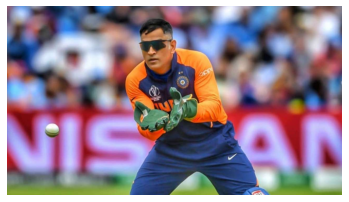

In [31]:
img=cv2.imread('ms.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
original_shape=img.shape
print(img.shape)
plt.axis("off")
plt.imshow(img)
plt.show()

In [12]:
all_pixels=img.reshape((-1,3))
print(all_pixels.shape)

(921600, 3)


In [13]:
from sklearn.cluster import KMeans

In [14]:
dominant_colors=4
km=KMeans(n_clusters=dominant_colors)
km.fit(all_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [18]:
centers=km.cluster_centers_
centers=np.array(centers,dtype='uint8')
print(centers)

[[184 178 224]
 [ 55  55  75]
 [177  93  66]
 [125 120 143]]


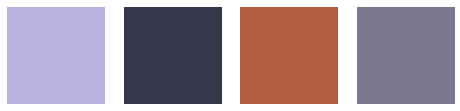

In [27]:
i=1
plt.figure(0,figsize=(8,2))
colors=[]
for each_col in centers:
    plt.subplot(1,4,i)
    i+=1
    colors.append(each_col)
    a=np.zeros((300,300,3),dtype='uint8')
    a[:,:,:]=each_col
    plt.imshow(a)
    plt.axis('off')
plt.show()

In [29]:
km.labels_

array([3, 3, 3, ..., 2, 2, 2])

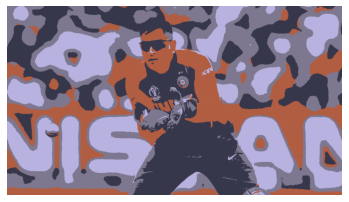

In [34]:
new_img=np.zeros((720*1280,3),dtype='uint8')
for ix in range (new_img.shape[0]):
    new_img[ix]=colors[km.labels_[ix]]
new_img=new_img.reshape((original_shape))
plt.imshow(new_img)
plt.axis('off')
plt.show()